# Regressão Linear - Stats Model - Machine Learning

#### Jonatha Rodrigues T. Vaz
#### 08.09.2023

# Inciando 

# Importando as Bibliotecas para Criação e Estudo da ML
# Criando Variavel para Leitura do Arquivo (DATAFRAME).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('Regresao_Linear.csv')

# Visualizando as primeiras linhas do DataFrame

In [2]:
dados.head()

,X,Y
0,0.00000,-11.656137
1,0.10101,-8.074456
2,0.20202,-16.588246
3,0.30303,-4.275013
4,0.40404,-8.714275


## Criando Variavéis "x" e "y" para criar o Modelo ML e suas relações de colunas e linhas.

In [3]:
X = dados['X'].values
Y = dados['Y'].values

# Visualizando em um Gráfico se existe uma Regressão Linear.

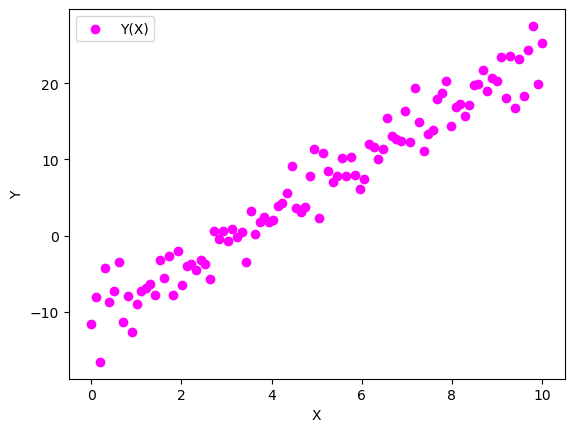

In [4]:
plt.scatter(X,Y,label='Y(X)', color='magenta');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

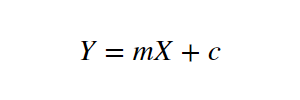

# Importando modelo de Estatístico através do Stats Model para Criação da ML.

In [5]:
import statsmodels.api as sm

# Criando o Modelo da ML de Regressão Linear e seu Treino.

In [6]:
modelo = sm.OLS(Y, X)

In [7]:
resultado = modelo.fit()

#### Visualizando o Resultado e o que precisa ser feito e suas informações para melhorar (se possivél) através de um Sumário. 

In [8]:
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              307.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                    4.23e-32
Time:                        17:00:23   Log-Likelihood:                         -322.75
No. Observations:                 100   AIC:                                      647.5
Df Residuals:                      99   BIC:                                      650.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Modelo Precisa de um Intercepto

### Criando um Intercepto com a Variavél "X".

In [9]:
X = sm.add_constant(X)

### Criando o Segunda Modelo necessário da ML de Regressão Linear e seu Segundo Treino.

In [10]:
modelo2 = sm.OLS(Y, X)

In [11]:
resultado2 = modelo2.fit()

## Visualizando o Resultado Final e suas informações, através de um Novo Sumário

In [12]:
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1740.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           3.40e-64
Time:                        17:01:39   Log-Likelihood:                -230.75
No. Observations:                 100   AIC:                             465.5
Df Residuals:                      98   BIC:                             470.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1095      0.488    -22.783      0.0

## Criando os Coeficientes (Angular e Linear) para Obter suas Relações do Modelo e Visualizar em um Gráfico de Regressão Linear

In [13]:
coef_linear, coef_angular = resultado2.params

## Criando a "Reta" Linear para Visualizar no Gráfico de Regressão, de acordo com as Variavés "x" e "y"

In [14]:
reta = coef_angular*X+coef_linear

In [15]:
X = X[:,1]
reta = reta[:,1]

## Visualizando o Gráfico de Regressão Linear com a "Reta", "X", "Y" e suas Relações

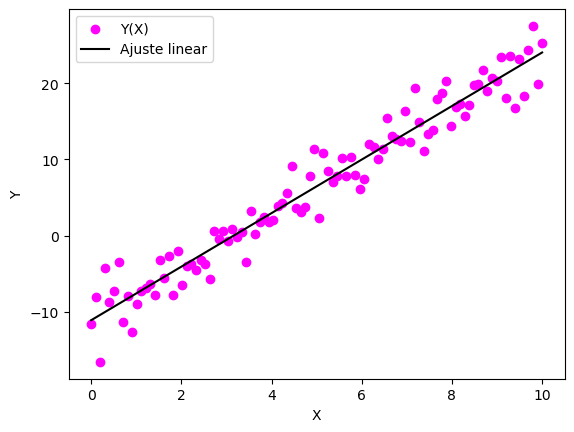

In [16]:
plt.scatter(X,Y,label='Y(X)', color='magenta');
plt.plot(X,reta,label='Ajuste linear',color='black');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

## Verificando possiveís Médias de Erros do Modelo ML através do SkLearn Metrics, Mean.Error e das Variaveís "x" e "y"

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(Y,reta)
RMSE = np.sqrt(mean_squared_error(Y,reta))

print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 1.89
RMSE = 2.43
